<a href="https://colab.research.google.com/github/hyehyuni/essa/blob/main/ESAA_hw0403.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[개념 정리]**
**4/3 과제 - Do it! 데이터분석을 위한 판다스 입문 pg.241 ~ 242, 256 ~ 263**



---

# **12. 시계열 데이터** 
시계열 데이터는 데이터 분석 분야에서 중요하게 다루는 데이터중 하나

일정 시간 간격으로 어떤 값을 기록한 데이터에서는 시계열 데이터가 매우 중요함

## **12-1) datetime 오브젝트**
datetime 라이브러리 
* 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리 
* 날짜를 처리하는 datetime 오브젝트, 시간을 처리하는 time 오브젝트, 날짜와 시간을 모두 처리하는 datetime 오브젝트가 포함됨

In [ ]:
from datetime import datetime

In [ ]:
# now, today 메소드 사용하여 현재 시간 출력하기 
now1 = datetime.now()
print(now1)

now2=datetime.today()
print(now2)

2023-04-05 14:53:46.338746
2023-04-05 14:53:46.339350


In [ ]:
# 시간을 직접 입력하여 인자로 전달 
t1= datetime.now()
t2=datetime(1970,1,1)
t3=datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2023-04-05 14:54:45.895615
1970-01-01 00:00:00
1970-12-12 13:24:34


In [ ]:
# 시간 계산하기 
diff1=t1-t2

print(diff1)
print(type(diff1))

19452 days, 14:54:45.895615
<class 'datetime.timedelta'>


In [ ]:
diff2=t2-t1

print(diff2)
print(type(diff2))

-19453 days, 9:05:14.104385
<class 'datetime.timedelta'>


## **테슬라 주식 데이터로 시간 계산하기**

In [ ]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#1
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

tesla = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/esaa/자료/tesla_stock_quandl.csv')

In [ ]:
#2 - 문자열로 저장된 Date 열을 datetime 오브젝트로 자료형 변환
print(tesla.head())

         Date    Open    High     Low   Close    Volume  ExDividend  \
0  2018-03-27  304.00  304.27  277.18  279.18  13696168           0   
1  2018-03-26  307.34  307.59  291.36  304.18   8324639           0   
2  2018-03-23  311.25  311.61  300.45  301.54   6600538           0   
3  2018-03-22  313.89  318.82  308.18  309.10   4914307           0   
4  2018-03-21  310.25  322.44  310.19  316.53   5927881           0   

   SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose  AdjVolume  
0           1   304.00   304.27  277.18    279.18   13696168  
1           1   307.34   307.59  291.36    304.18    8324639  
2           1   311.25   311.61  300.45    301.54    6600538  
3           1   313.89   318.82  308.18    309.10    4914307  
4           1   310.25   322.44  310.19    316.53    5927881  


In [ ]:
#3 parse_dates 인자에 Date 열을 전달하기 
tesla=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/esaa/자료/tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   int64         
 6   ExDividend  1949 non-null   int64         
 7   SplitRatio  1949 non-null   int64         
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(4)
memory usage: 198.1 KB
None


In [ ]:
#4 - 불린 추출로 2010년 6월 데이터만 추출하기 
print(tesla.loc[(tesla.Date.dt.year==2010) & (tesla.Date.dt.month==6)])

           Date   Open     High    Low  Close    Volume  ExDividend  \
1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100           0   
1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300           0   

      SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose  AdjVolume  
1947           1    25.79  30.4192   23.30     23.83   17187100  
1948           1    19.00  25.0000   17.54     23.89   18766300  


## **datetime 오브젝트와 인덱스 - DatetimeIndex**

In [ ]:
#1 - Date 열을 tesla 데이터프레임의 인덱스로 지정 
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


In [ ]:
#2 - 원하는 시간의 데이터 추출하기 
print(tesla['2015'].iloc[:5,:5])

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


<ipython-input-21-2be0252011cf>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2015'].iloc[:5,:5])


In [ ]:
#3 -2010년 6월의 데이터 추출 
print(tesla['2010-06'].iloc[:,:5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


<ipython-input-22-41cfc67a15e7>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2010-06'].iloc[:,:5])


## **시간 간격과 인덱스 - TimedeltaIndex**
시간 간격을 인덱스로 지정하여 진행하는 방법

In [ ]:
#1 -Date 열에서 Date 열의 최솟값을 빼면 데이터를 수집한 이후 시간을 알 수 있음 
tesla['ref_date']=tesla['Date']-tesla['Date'].min()
print(tesla.head())

                 Date    Open    High     Low   Close    Volume  ExDividend  \
Date                                                                          
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168           0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639           0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538           0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307           0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881           0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose  AdjVolume  \
Date                                                                    
2018-03-27           1   304.00   304.27  277.18    279.18   13696168   
2018-03-26           1   307.34   307.59  291.36    304.18    8324639   
2018-03-23           1   311.25   311.61  300.45    301.54    6600538   
2018-03-22           1   313.89   318.82  308.18    309.10    4914307   
2018-03-

In [ ]:
#2 - ref_date 열을 인덱스로 지정하기 
tesla.index=tesla['ref_date']
print(tesla.iloc[:5,:5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


In [ ]:
#3 - 데이터를 수집한 이후 최소 5일의 데이터 추출 
print(tesla['5 days':].iloc[:5,:5])

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


## **시간 범위와 인덱스**
특정 일에 누락된 데이터도 포함시켜 데이터를 살펴보려면 임의로 시간 범위를 생성하여 인덱스로 지정해야한다.

In [ ]:
#1 - 누락된 데이터가 있는 에볼라 데이터  =>  데이터가 누락됨을 확인
ebola = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/esaa/자료/country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [ ]:
#2 - 데이터 누락 확인
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [ ]:
#3 - date_range 메서드를 사용 
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
#4 - 원본데이터 손상 방지를 위해 추출
ebola_5=ebola.head()
ebola_5.index=ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


**시간 범위의 주기 설정하기**

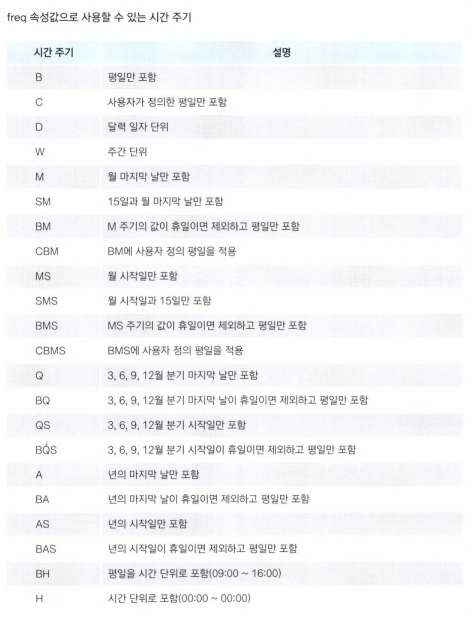

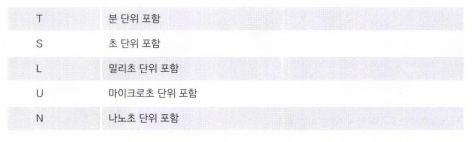